## Mental health Prediction - Data cleaning

Lot of cleaning process, went into the data pre-processing. There are many features in the data that we have obtained including individual's physiological conditions, medical conditions, prescription medications and lifestyle factors. As our aim to to create a questionnaire data, which is easily answerable by any individual, hence colums like total_cholesterol, blood_transfusion, RBC_Count, platelet_count are removed from the dataset.

The outliers in medical data need to be taken into consideration, as the medical data could be really varied.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import product
from scipy import stats as ss
from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("CDC_Data/TotalData1.csv", low_memory=False)

In [9]:
df

SEQN     depression                   race   education_level pregnant  \
0     109266  Not Depressed  Other and Multiracial  College Graduate       No   
1     109271  Not Depressed                  White       9th to 11th  Missing   
2     109273      Depressed                  White      Some College  Missing   
3     109274  Not Depressed  Other and Multiracial      Some College  Missing   
4     109282  Not Depressed                  White  College Graduate  Missing   
...      ...            ...                    ...               ...      ...   
8271  124815  Not Depressed                  Black      Some College  Missing   
8272  124817  Not Depressed                Mexican       9th to 11th  Missing   
8273  124818  Not Depressed                  Black  College Graduate  Missing   
8274  124821  Not Depressed                  Black       9th to 11th  Missing   
8275  124822  Not Depressed         Other Hispanic       High School  Missing   

     birth_place  Gender  Age_in_years  asthma  asthma_currently  ...  \
0         Mexico       1            29     0.0               0.0  ...   
1            USA       0            49     1.0               1.0  ...   
2            USA       0            36     0.0               0.0  ...   
3            USA       0            68     0.0               0.0  ...   
4            USA       0            76     0.0               0.0  ...   
...          ...     ...           ...     ...               ...  ...   
8271         USA       0            52     0.0               0.0  ...   
8272      Mexico       1            67     0.0               0.0  ...   
8273         USA       0            40     0.0               0.0  ...   
8274         USA       0            63     1.0               1.0  ...   
8275      Mexico       0            74     0.0               0.0  ...   

      Rx_MEMANTINE  Rx_days_MEMANTINE  Rx_PENICILLIN  Rx_days_PENICILLIN  \
0                0                  0              0                   0   
1                0                  0              0                   0   
2                0                  0              0                   0   
3                0                  0              0                   0   
4                0                  0              0                   0   
...            ...                ...            ...                 ...   
8271             0                  0              0                   0   
8272             0                  0              0                   0   
8273             0                  0              0                   0   
8274             0                  0              0                   0   
8275             0                  0              0                   0   

      Rx_DIPHENHYDRAMINE  Rx_days_DIPHENHYDRAMINE  Rx_MINOCYCLINE  \
0                      0                        0               0   
1                      0                        0               0   
2                      0                        0               0   
3                      0                        0               0   
4                      0                        0               0   
...                  ...                      ...             ...   
8271                   0                        0               0   
8272                   0                        0               0   
8273                   0                        0               0   
8274                   0                        0               0   
8275                   0                        0               0   

      Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  Rx_days_METHOCARBAMOL  
0                       0                 0                      0  
1                       0                 0                      0  
2                       0                 0                      0  
3                       0                 0                      0  
4                       0                 0                      0  
..

In [14]:
df['height'].describe()

count    8276.000000
mean      165.143693
std        20.047620
min         0.000000
25%       159.300000
50%       166.400000
75%       174.100000
max       199.600000
Name: height, dtype: float64

In [12]:
df['weight'].describe()

count    8276.000000
mean       82.899529
std        24.622917
min         0.000000
25%        67.200000
50%        79.800000
75%        95.700000
max       254.300000
Name: weight, dtype: float64

In [15]:
df['BMI'].describe()

count    8276.000000
mean       29.585246
std         8.251888
min         0.000000
25%        24.500000
50%        28.600000
75%        33.600000
max        92.300000
Name: BMI, dtype: float64

The weight column is recalculated in pounds using BMI and height, with height in cms and BMI in kg/m2.

Few other colums like 'pregnant', 'household_smokers', 'Age at first live birth' etc., are removed from the dataset as they have a huge chunk of data which is 'Missing'.

In [16]:
df.drop(columns=['Age range at first menstrual period', 'Age range at last menstrual period', 'How many times have been pregnant?',
 'Age at first live birth', 'Age at last live birth', 'heart_disease_onset', 'Hours worked last week', 'work schedule past 3 months',
 'Usually work 35 or more hours per week', 'arthritis_type', 'pregnant', 'days_quit_smoking', 'start_smoking_age', 'household_smokers', 'income_poverty_index'
], inplace=True)
df.drop(columns=['blood_transfusion', 'weight', 'previous_cigarettes_per_day', 'current_smoker',
'systolic', 'diastolic', 'pulse', 'total_cholesterol', 'HDL',
       'triglyceride', 'LDL', 'ALT', 'albumin', 'ALP', 'AST', 'CO2', 'BUN',
       'chloride', 'creatinine', 'globulin', 'glucose', 'GGT', 'iron', 'LHD',
       'osmolality', 'phosphorus', 'potassium', 'sodium', 'bilirubin',
       'calcium', 'total_protein', 'uric_acid', 'white_BCC',
       'lymphocyte_percent', 'monocyte_percent', 'neutrophils_percent',
       'eosinophils_percent', 'basophils_percent', 'lymphocyte_count',
       'monocyte_count', 'neutrophils_count', 'eosinophils_count',
       'basophils_count', 'RBC_count', 'hemoglobin', 'hematocrit', 'MCV',
       'MCHC', 'MCH', 'RDW', 'platelet_count', 'MPV'], inplace=True)

In [17]:
categorical_columns = ['race', 'education_level', 'birth_place',
       'Gender', 'asthma', 'asthma_currently', 'hay_fever', 'anemia', 'ever_overweight',
       'arthritis', 'heart_failure', 'heart_disease', 'angina', 'heart_attack',
       'stroke', 'thyroid_problem', 'thyroid_problem_currently', 'liver_condition',
       'liver_condition_currently', 'cancer','asthma_relative', 'diabetes_relative',
       'heart_attack_relative', 'work_type', 'trouble_sleeping_history',
       'vigorous_recreation', 'moderate_recreation', 'vigorous_work',
       'moderate_work', 'lifetime_alcohol_consumption']

continuous_columns = ['Age_in_years', 'height', 'weight', 'sleep_hours',
        'sedentary_time', 'drinks_per_occasion', 'drinks_past_year', 'current_cigarettes_per_day', 'prescriptions_count']

In [18]:
for column in categorical_columns:
    df = df[df[column] != 'Missing']
df

SEQN     depression                   race   education_level  \
0     109266  Not Depressed  Other and Multiracial  College Graduate   
1     109271  Not Depressed                  White       9th to 11th   
2     109273      Depressed                  White      Some College   
3     109274  Not Depressed  Other and Multiracial      Some College   
4     109282  Not Depressed                  White  College Graduate   
...      ...            ...                    ...               ...   
8271  124815  Not Depressed                  Black      Some College   
8272  124817  Not Depressed                Mexican       9th to 11th   
8273  124818  Not Depressed                  Black  College Graduate   
8274  124821  Not Depressed                  Black       9th to 11th   
8275  124822  Not Depressed         Other Hispanic       High School   

     birth_place  Gender  Age_in_years  asthma  asthma_currently  \
0         Mexico       1            29     0.0               0.0   
1            USA       0            49     1.0               1.0   
2            USA       0            36     0.0               0.0   
3            USA       0            68     0.0               0.0   
4            USA       0            76     0.0               0.0   
...          ...     ...           ...     ...               ...   
8271         USA       0            52     0.0               0.0   
8272      Mexico       1            67     0.0               0.0   
8273         USA       0            40     0.0               0.0   
8274         USA       0            63     1.0               1.0   
8275      Mexico       0            74     0.0               0.0   

      asthma_emergency  ...  Rx_MEMANTINE  Rx_days_MEMANTINE  Rx_PENICILLIN  \
0                  0.0  ...             0                  0              0   
1                  0.0  ...             0                  0              0   
2                  0.0  ...             0                  0              0   
3                  0.0  ...             0                  0              0   
4                  0.0  ...             0                  0              0   
...                ...  ...           ...                ...            ...   
8271               0.0  ...             0                  0              0   
8272               0.0  ...             0                  0              0   
8273               0.0  ...             0                  0              0   
8274               0.0  ...             0                  0              0   
8275               0.0  ...             0                  0              0   

      Rx_days_PENICILLIN  Rx_DIPHENHYDRAMINE  Rx_days_DIPHENHYDRAMINE  \
0                      0                   0                        0   
1                      0                   0                        0   
2                      0                   0                        0   
3                      0                   0                        0   
4                      0                   0                        0   
...                  ...                 ...                      ...   
8271                   0                   0                        0   
8272                   0                   0                        0   
8273                   0                   0                        0   
8274                   0                   0                        0   
8275                   0                   0                        0   

      Rx_MINOCYCLINE  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  \
0                  0                    0                 0   
1                  0                    0                 0   
2                  0                    0                 0   
3                  0                    0                 0   
4                  0                    0                 0   
...              ...                  ...               ...   
8271               0                    0                 0

In [19]:
df=df[df['current_cigarettes_per_day'] < 200 ]
df

SEQN     depression                   race   education_level  \
0     109266  Not Depressed  Other and Multiracial  College Graduate   
1     109271  Not Depressed                  White       9th to 11th   
2     109273      Depressed                  White      Some College   
3     109274  Not Depressed  Other and Multiracial      Some College   
4     109282  Not Depressed                  White  College Graduate   
...      ...            ...                    ...               ...   
8271  124815  Not Depressed                  Black      Some College   
8272  124817  Not Depressed                Mexican       9th to 11th   
8273  124818  Not Depressed                  Black  College Graduate   
8274  124821  Not Depressed                  Black       9th to 11th   
8275  124822  Not Depressed         Other Hispanic       High School   

     birth_place  Gender  Age_in_years  asthma  asthma_currently  \
0         Mexico       1            29     0.0               0.0   
1            USA       0            49     1.0               1.0   
2            USA       0            36     0.0               0.0   
3            USA       0            68     0.0               0.0   
4            USA       0            76     0.0               0.0   
...          ...     ...           ...     ...               ...   
8271         USA       0            52     0.0               0.0   
8272      Mexico       1            67     0.0               0.0   
8273         USA       0            40     0.0               0.0   
8274         USA       0            63     1.0               1.0   
8275      Mexico       0            74     0.0               0.0   

      asthma_emergency  ...  Rx_MEMANTINE  Rx_days_MEMANTINE  Rx_PENICILLIN  \
0                  0.0  ...             0                  0              0   
1                  0.0  ...             0                  0              0   
2                  0.0  ...             0                  0              0   
3                  0.0  ...             0                  0              0   
4                  0.0  ...             0                  0              0   
...                ...  ...           ...                ...            ...   
8271               0.0  ...             0                  0              0   
8272               0.0  ...             0                  0              0   
8273               0.0  ...             0                  0              0   
8274               0.0  ...             0                  0              0   
8275               0.0  ...             0                  0              0   

      Rx_days_PENICILLIN  Rx_DIPHENHYDRAMINE  Rx_days_DIPHENHYDRAMINE  \
0                      0                   0                        0   
1                      0                   0                        0   
2                      0                   0                        0   
3                      0                   0                        0   
4                      0                   0                        0   
...                  ...                 ...                      ...   
8271                   0                   0                        0   
8272                   0                   0                        0   
8273                   0                   0                        0   
8274                   0                   0                        0   
8275                   0                   0                        0   

      Rx_MINOCYCLINE  Rx_days_MINOCYCLINE  Rx_METHOCARBAMOL  \
0                  0                    0                 0   
1                  0                    0                 0   
2                  0                    0                 0   
3                  0                    0                 0   
4                  0                    0                 0   
...              ...                  ...               ...   
8271               0                    0                 0

In [20]:
prs = df.iloc[:, 56:].columns
prescription=[col for col in prs if 'days' not in col]
prescription_duration = [col for col in prs if 'days' in col]

In [21]:
df['BMI'].value_counts()

BMI
0.0     92
25.2    64
27.9    64
29.1    62
25.5    60
        ..
55.9     1
65.1     1
46.7     1
52.4     1
51.7     1
Name: count, Length: 445, dtype: int64

In [22]:
mean_height = df[df['height'] != 0]['height'].mean()
df['height'] = df['height'].replace(0, mean_height)
df['height'].value_counts()

<ipython-input-22-d8ad0d413a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].replace(0, mean_height)


height
166.908801    81
164.600000    41
161.400000    41
166.300000    40
161.100000    39
              ..
195.600000     1
138.300000     1
192.100000     1
145.000000     1
193.600000     1
Name: count, Length: 524, dtype: int64

In [23]:

df = df[df['BMI'] != 0]
df['weight'] = ((df['height']/100)**2)*df['BMI']*2.20462
df['weight']

<ipython-input-23-d819783bde7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = ((df['height']/100)**2)*df['BMI']*2.20462


0       213.870343
1       217.602324
2       163.816299
3       228.608053
4       183.929971
           ...    
8271    207.917377
8272    182.524775
8273    239.677503
8274    174.932735
8275    131.747678
Name: weight, Length: 7772, dtype: float64

In [24]:
df.shape

(7772, 385)

In [25]:
df.drop_duplicates(inplace=True)

<ipython-input-25-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [26]:
fig = px.violin(df, x='depression', y='Age_in_years', color='Gender', title='Age and Depression',
                labels={'Age_in_years': 'Age', 'depression': 'Depression'})
fig.update_layout(xaxis_title='Depression', yaxis_title='Age')
fig.show()

In [27]:
fig = px.histogram(df, x='education_level', color='depression',histnorm='probability density', barmode='group')
fig.update_layout(
    title='Education Level and Depression',
    xaxis_title='Education Level',
    yaxis_title='Count'
)
fig.show()

In [28]:
fig = px.histogram(df, x='Age_in_years', color='depression', title='Age and Depression',
                   histnorm='probability density', barmode='group', nbins=30)
fig.update_layout(xaxis_title='Age', yaxis_title='Density')
fig.show()

In [29]:
fig = px.scatter(df, x='Age_in_years', y='weight', color='depression', marginal_x='histogram', marginal_y='histogram',
                 opacity=0.7, trendline='ols', title='Jointplot of Age vs BMI with KDE')
fig.update_layout(title_x=0.5)
fig.show()

The data of prescription medications, is manually clustered into 14 clusters, which are psychotic_medications, bloodpressure_medications respiratory_medications, endocrine_medications, git_medications, antibiotic_medications, opiods_medications, nervous_system_medications, nonopiod_antiinflammatory_medications, anti_clotting_medications,immunosuppressants_medications, muscle_relaxant_medications, cardiovasular_medications, metabolic_disorders_medications based on the use case of each medication.

In [30]:
psychotic_medications = [
    'Rx_ALPRAZOLAM',
    'Rx_ZOLPIDEM',
    'Rx_LORAZEPAM',
    'Rx_HYDROXYZINE',
    'Rx_BUSPIRONE',
    'Rx_DIAZEPAM',
    'Rx_TEMAZEPAM']
bloodpressure_medications = [
    'Rx_LISINOPRIL', 'Rx_METOPROLOL', 'Rx_AMLODIPINE', 'Rx_HYDROCHLOROTHIAZIDE', 'Rx_FUROSEMIDE',
    'Rx_ATENOLOL', 'Rx_LOSARTAN', 'Rx_CARVEDILOL', 'Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL', 'Rx_VALSARTAN',
    'Rx_DILTIAZEM', 'Rx_ENALAPRIL', 'Rx_GLYBURIDE', 'Rx_SPIRONOLACTONE', 'Rx_HYDROCHLOROTHIAZIDE; LOSARTAN',
    'Rx_NIFEDIPINE', 'Rx_AMLODIPINE; BENAZEPRIL', 'Rx_RAMIPRIL', 'Rx_BENAZEPRIL', 'Rx_TERAZOSIN',
    'Rx_VERAPAMIL', 'Rx_PROPRANOLOL', 'Rx_DOXAZOSIN', 'Rx_HYDROCHLOROTHIAZIDE; VALSARTAN', 'Rx_LATANOPROST OPHTHALMIC',
    'Rx_HYDRALAZINE', 'Rx_OLMESARTAN', 'Rx_QUINAPRIL', 'Rx_IRBESARTAN', 'Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN',
    'Rx_BRIMONIDINE OPHTHALMIC', 'Rx_TIMOLOL OPHTHALMIC', 'Rx_TRIAMTERENE']
metabolic_disorders_medications = [
    'Rx_POTASSIUM CHLORIDE',
    'Rx_ALLOPURINOL',
    'Rx_ALENDRONATE',
    'Rx_FENOFIBRATE',
    'Rx_NIACIN',
    'Rx_RISEDRONATE',
    'Rx_RALOXIFENE',
    'Rx_SIMVASTATIN',
    'Rx_ATORVASTATIN',
    'Rx_PRAVASTATIN',
    'Rx_ROSUVASTATIN',
    'Rx_LOVASTATIN',
    'Rx_EZETIMIBE',
    'Rx_EZETIMIBE; SIMVASTATIN',
    'Rx_GEMFIBROZIL']
respiratory_medications = [
    'Rx_ALBUTEROL',
    'Rx_MONTELUKAST',
    'Rx_FLUTICASONE; SALMETEROL',
    'Rx_TIOTROPIUM',
    'Rx_ALBUTEROL; IPRATROPIUM',
    'Rx_BECLOMETHASONE',
    'Rx_BUDESONIDE; FORMOTEROL',
    'Rx_LEVALBUTEROL',
    'Rx_IPRATROPIUM']
endocrine_medications = [
    'Rx_LEVOTHYROXINE',
    'Rx_ESTRADIOL',
    'Rx_CONJUGATED ESTROGENS',
    'Rx_ETHINYL ESTRADIOL; LEVONORGESTREL',
    'Rx_ETHINYL ESTRADIOL; NORGESTIMATE',
    'Rx_ETHINYL ESTRADIOL; NORETHINDRONE',
    'Rx_FINASTERIDE',
    'Rx_TAMSULOSIN',
    'Rx_DROSPIRENONE; ETHINYL ESTRADIOL',
    'Rx_METFORMIN',
    'Rx_INSULIN GLARGINE',
    'Rx_GLIPIZIDE',
    'Rx_GLYBURIDE; METFORMIN',
    'Rx_GLIMEPIRIDE',
    'Rx_PIOGLITAZONE',
    'Rx_INSULIN ASPART',
    'Rx_SITAGLIPTIN',
    'Rx_INSULIN LISPRO',
    'Rx_INSULIN DETEMIR',
    'Rx_INSULIN ISOPHANE; INSULIN REGULAR',
    'Rx_INSULIN REGULAR']
git_medications = [
    'Rx_OMEPRAZOLE',
    'Rx_RANITIDINE',
    'Rx_ESOMEPRAZOLE',
    'Rx_PANTOPRAZOLE',
    'Rx_LANSOPRAZOLE',
    'Rx_FAMOTIDINE',
    'Rx_POLYETHYLENE GLYCOL 3350',
    'Rx_METOCLOPRAMIDE',
    'Rx_DOCUSATE',
    'Rx_ONDANSETRON',
    'Rx_RABEPRAZOLE']
antibiotic_medications = [
    'Rx_AMOXICILLIN',
    'Rx_AZITHROMYCIN',
    'Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM',
    'Rx_CEPHALEXIN',
    'Rx_AMOXICILLIN; CLAVULANATE',
    'Rx_DOXYCYCLINE',
    'Rx_CIPROFLOXACIN',
    'Rx_CEFDINIR',
    'Rx_ACYCLOVIR',
    'Rx_NITROFURANTOIN',
    'Rx_PENICILLIN',
    'Rx_MINOCYCLINE']
opiods_medications = [
    'Rx_ACETAMINOPHEN; HYDROCODONE',
    'Rx_TRAMADOL',
    'Rx_HYDROCODONE',
    'Rx_OXYCODONE',
    'Rx_ACETAMINOPHEN; OXYCODONE',
    'Rx_ACETAMINOPHEN; CODEINE',
    'Rx_ACETAMINOPHEN; PROPOXYPHENE']
nervous_system_medications = [
    'Rx_GABAPENTIN',
    'Rx_CLONAZEPAM',
    'Rx_AMPHETAMINE; DEXTROAMPHETAMINE',
    'Rx_DONEPEZIL',
    'Rx_TOPIRAMATE',
    'Rx_PREGABALIN',
    'Rx_MECLIZINE',
    'Rx_LEVETIRACETAM',
    'Rx_PHENYTOIN',
    'Rx_ROPINIROLE',
    'Rx_SUMATRIPTAN',
    'Rx_MEMANTINE',
    'Rx_LISDEXAMFETAMINE',
    'Rx_METHYLPHENIDATE',
    'Rx_CLONIDINE']
nonopiod_antiinflammatory_medications = [
    'Rx_IBUPROFEN',
    'Rx_MELOXICAM',
    'Rx_NAPROXEN',
    'Rx_ASPIRIN',
    'Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE',
    'Rx_CELECOXIB',
    'Rx_DICLOFENAC',
    'Rx_COLCHICINE']
anti_clotting_medications = [
    'Rx_CLOPIDOGREL',
    'Rx_WARFARIN']
immunosuppressants_medications = [
    'Rx_FLUTICASONE NASAL',
    'Rx_CETIRIZINE',
    'Rx_PREDNISONE',
    'Rx_FLUTICASONE',
    'Rx_FEXOFENADINE',
    'Rx_MOMETASONE NASAL',
    'Rx_METHOTREXATE',
    'Rx_PROMETHAZINE',
    'Rx_HYDROXYCHLOROQUINE',
    'Rx_TRIAMCINOLONE TOPICAL',
    'Rx_PREDNISOLONE',
    'Rx_DIPHENHYDRAMINE',
    'Rx_BUDESONIDE']
muscle_relaxant_medications = [
    'Rx_CYCLOBENZAPRINE',
    'Rx_OXYBUTYNIN',
    'Rx_BACLOFEN',
    'Rx_TIZANIDINE',
    'Rx_TOLTERODINE',
    'Rx_METHOCARBAMOL']
cardiovasular_medications = [
    'Rx_DIGOXIN',
    'Rx_NITROGLYCERIN',
    'Rx_ISOSORBIDE MONONITRATE',
    'Rx_AMIODARONE',
    'Rx_ISOSORBIDE']

In [31]:
meds_names_list = ['psychotic_medications', 'bloodpressure_medications', 'respiratory_medications',
             'endocrine_medications', 'git_medications', 'antibiotic_medications', 'opiods_medications',
             'nervous_system_medications', 'nonopiod_antiinflammatory_medications', 'anti_clotting_medications',
             'immunosuppressants_medications', 'muscle_relaxant_medications', 'cardiovasular_medications',
             'metabolic_disorders_medications']
meds_list = [psychotic_medications, bloodpressure_medications, respiratory_medications,
             endocrine_medications, git_medications, antibiotic_medications, opiods_medications,
             nervous_system_medications, nonopiod_antiinflammatory_medications, anti_clotting_medications,
             immunosuppressants_medications, muscle_relaxant_medications, cardiovasular_medications,
             metabolic_disorders_medications]

In [32]:
new_df = pd.DataFrame(index=df.index)
meds_names_list = ['psychotic_medications', 'bloodpressure_medications', 'respiratory_medications',
             'endocrine_medications', 'git_medications', 'antibiotic_medications', 'opiods_medications',
             'nervous_system_medications', 'nonopiod_antiinflammatory_medications', 'anti_clotting_medications',
             'immunosuppressants_medications', 'muscle_relaxant_medications', 'cardiovasular_medications',
             'metabolic_disorders_medications']
for med_name in meds_names_list:
    new_df[med_name] = 0
df2 = pd.concat([df, new_df], axis=1)
df2

SEQN     depression                   race   education_level  \
0     109266  Not Depressed  Other and Multiracial  College Graduate   
1     109271  Not Depressed                  White       9th to 11th   
2     109273      Depressed                  White      Some College   
3     109274  Not Depressed  Other and Multiracial      Some College   
4     109282  Not Depressed                  White  College Graduate   
...      ...            ...                    ...               ...   
8271  124815  Not Depressed                  Black      Some College   
8272  124817  Not Depressed                Mexican       9th to 11th   
8273  124818  Not Depressed                  Black  College Graduate   
8274  124821  Not Depressed                  Black       9th to 11th   
8275  124822  Not Depressed         Other Hispanic       High School   

     birth_place  Gender  Age_in_years  asthma  asthma_currently  \
0         Mexico       1            29     0.0               0.0   
1            USA       0            49     1.0               1.0   
2            USA       0            36     0.0               0.0   
3            USA       0            68     0.0               0.0   
4            USA       0            76     0.0               0.0   
...          ...     ...           ...     ...               ...   
8271         USA       0            52     0.0               0.0   
8272      Mexico       1            67     0.0               0.0   
8273         USA       0            40     0.0               0.0   
8274         USA       0            63     1.0               1.0   
8275      Mexico       0            74     0.0               0.0   

      asthma_emergency  ...  git_medications  antibiotic_medications  \
0                  0.0  ...                0                       0   
1                  0.0  ...                0                       0   
2                  0.0  ...                0                       0   
3                  0.0  ...                0                       0   
4                  0.0  ...                0                       0   
...                ...  ...              ...                     ...   
8271               0.0  ...                0                       0   
8272               0.0  ...                0                       0   
8273               0.0  ...                0                       0   
8274               0.0  ...                0                       0   
8275               0.0  ...                0                       0   

      opiods_medications  nervous_system_medications  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   
...                  ...                         ...   
8271                   0                           0   
8272                   0                           0   
8273                   0                           0   
8274                   0                           0   
8275                   0                           0   

      nonopiod_antiinflammatory_medications  anti_clotting_medications  \
0                                         0                          0   
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   
...                                     ...                        ...   
8271                                      0                          0   
8272                                      0                          0   
8273                                      0                          0   
8274                                      0     

In [33]:
df2['medications_with_value_1'] = ''
for index, row in df2[prescription].iterrows():
    meds_with_value_1 = [col for col in df2[prescription].columns if row[col] == 1]
    df2.at[index, 'medications_with_value_1'] = ', '.join(meds_with_value_1)
df2['medications_with_value_1']

0                                                        
1                        Rx_SIMVASTATIN, Rx_LEVETIRACETAM
2            Rx_ACETAMINOPHEN; HYDROCODONE, Rx_FAMOTIDINE
3       Rx_LISINOPRIL, Rx_METFORMIN, Rx_SIMVASTATIN, R...
4       Rx_AMLODIPINE, Rx_GABAPENTIN, Rx_TRAMADOL, Rx_...
                              ...                        
8271                                                     
8272    Rx_METFORMIN, Rx_ATORVASTATIN, Rx_FUROSEMIDE, ...
8273                                                     
8274    Rx_METOPROLOL, Rx_TAMSULOSIN, Rx_MELOXICAM, Rx...
8275                          Rx_ATORVASTATIN, Rx_ASPIRIN
Name: medications_with_value_1, Length: 7772, dtype: object

In [34]:
df2['medications_with_value_1'] = df2['medications_with_value_1'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [35]:
def count_medication(row, medication_list):
    return sum(row[col] for col in medication_list)
count_functions = {}
for category in meds_names_list:
    count_functions[category] = lambda row, category=category: sum(row[col] for col in eval(category))
for category, count_func in count_functions.items():
    df2[f'{category}'] = df2.apply(count_func, axis=1)
df2

SEQN     depression                   race   education_level  \
0     109266  Not Depressed  Other and Multiracial  College Graduate   
1     109271  Not Depressed                  White       9th to 11th   
2     109273      Depressed                  White      Some College   
3     109274  Not Depressed  Other and Multiracial      Some College   
4     109282  Not Depressed                  White  College Graduate   
...      ...            ...                    ...               ...   
8271  124815  Not Depressed                  Black      Some College   
8272  124817  Not Depressed                Mexican       9th to 11th   
8273  124818  Not Depressed                  Black  College Graduate   
8274  124821  Not Depressed                  Black       9th to 11th   
8275  124822  Not Depressed         Other Hispanic       High School   

     birth_place  Gender  Age_in_years  asthma  asthma_currently  \
0         Mexico       1            29     0.0               0.0   
1            USA       0            49     1.0               1.0   
2            USA       0            36     0.0               0.0   
3            USA       0            68     0.0               0.0   
4            USA       0            76     0.0               0.0   
...          ...     ...           ...     ...               ...   
8271         USA       0            52     0.0               0.0   
8272      Mexico       1            67     0.0               0.0   
8273         USA       0            40     0.0               0.0   
8274         USA       0            63     1.0               1.0   
8275      Mexico       0            74     0.0               0.0   

      asthma_emergency  ...  antibiotic_medications  opiods_medications  \
0                  0.0  ...                       0                   0   
1                  0.0  ...                       0                   0   
2                  0.0  ...                       0                   1   
3                  0.0  ...                       0                   0   
4                  0.0  ...                       0                   1   
...                ...  ...                     ...                 ...   
8271               0.0  ...                       0                   0   
8272               0.0  ...                       0                   0   
8273               0.0  ...                       0                   0   
8274               0.0  ...                       0                   0   
8275               0.0  ...                       0                   0   

      nervous_system_medications  nonopiod_antiinflammatory_medications  \
0                              0                                      0   
1                              1                                      0   
2                              0                                      0   
3                              1                                      0   
4                              2                                      0   
...                          ...                                    ...   
8271                           0                                      0   
8272                           1                                      0   
8273                           0                                      0   
8274                           0                                      1   
8275                           0                                      1   

      anti_clotting_medications  immunosuppressants_medications  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
8271                          0                        

In [36]:
medication_classes = [
    'psychotic_medications', 'bloodpressure_medications', 'respiratory_medications',
    'endocrine_medications', 'git_medications', 'antibiotic_medications', 'opiods_medications',
    'nervous_system_medications', 'nonopiod_antiinflammatory_medications', 'anti_clotting_medications',
    'immunosuppressants_medications', 'muscle_relaxant_medications', 'cardiovasular_medications',
    'metabolic_disorders_medications'
]
df_melted = df2.melt(id_vars=['depression'], value_vars=medication_classes, var_name='Medication_Class', value_name='Num_Medications')
fig = px.histogram(df_melted, x='Medication_Class', y='Num_Medications', color='depression', barmode='group',
                   histnorm='probability density', title='Probability Density of Number of Medications in Each Class Used by Each User',
                   labels={'Medication_Class': 'Medication Class', 'Num_Medications': 'Number of Medications'},
                   category_orders={'depression': ['No', 'Yes']})
fig.update_layout(xaxis=dict(title='Medication Class', tickangle=45),
                  yaxis=dict(title='Probability Density'))
fig.show()



In [37]:
df2['psychotic_medications']
for i in meds_names_list:
  dfk=df2[df2[i]!=0]
  print(i + ' : ', len(dfk))

psychotic_medications :  347
bloodpressure_medications :  2640
respiratory_medications :  419
endocrine_medications :  1751
git_medications :  939
antibiotic_medications :  222
opiods_medications :  369
nervous_system_medications :  726
nonopiod_antiinflammatory_medications :  569
anti_clotting_medications :  258
immunosuppressants_medications :  403
muscle_relaxant_medications :  263
cardiovasular_medications :  114
metabolic_disorders_medications :  1891


In [38]:
df.drop(columns=prescription, inplace=True)
df.shape

<ipython-input-38-7ced41442c42>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(7772, 221)

In [39]:
categorical_features = categorical_columns
continuous_features = continuous_columns + prescription_duration
df['depression']=df['depression'].replace({'Not Depressed':0,'Depressed':1})
df['depression'].unique()

<ipython-input-39-dacb8af8b4ec>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

Chi-squre test is performed to check the dependency of the categorical features with the target variable, considering the null hypothesis to be that the target variable and the mentioned features are independent. Hence all the features with p-value<0.05 are listed.

In [40]:
df_cat = df[categorical_features]
cat_var1 = 'depression'
cat_var2 = categorical_features

pres_var_prod = list(product([cat_var1], cat_var2))
result = []
for i in pres_var_prod:
    if i[0] != i[1]:
        result.append((i[0], i[1], list(ss.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))
result

[('depression', 'race', 0.01633042123159789),
 ('depression', 'education_level', 1.2452259900391808e-16),
 ('depression', 'birth_place', 2.3841649494535105e-06),
 ('depression', 'Gender', 2.845336008547302e-09),
 ('depression', 'asthma', 1.277634665017263e-16),
 ('depression', 'asthma_currently', 8.465180968367273e-21),
 ('depression', 'hay_fever', 1.3235891158585006e-15),
 ('depression', 'anemia', 2.141005623314628e-06),
 ('depression', 'ever_overweight', 8.998260293201771e-20),
 ('depression', 'arthritis', 5.219095651638006e-25),
 ('depression', 'heart_failure', 2.7768524812941934e-09),
 ('depression', 'heart_disease', 0.00048462490580937923),
 ('depression', 'angina', 3.7096852338232507e-06),
 ('depression', 'heart_attack', 1.392775567104853e-05),
 ('depression', 'stroke', 3.4656447620630173e-14),
 ('depression', 'thyroid_problem', 1.4250375506624854e-06),
 ('depression', 'thyroid_problem_currently', 0.0007252222497390432),
 ('depression', 'liver_condition', 6.470425229938001e-11),


In [42]:
threshold = 0.05
dependent_features = [feature for feature in result if feature[2] < threshold]
relevant_cat_features = []
print("Relevant Categorical Features:")
for feature in dependent_features:
    relevant_cat_features.append(feature[1])
relevant_cat_features

Relevant Categorical Features:


['race',
 'education_level',
 'birth_place',
 'Gender',
 'asthma',
 'asthma_currently',
 'hay_fever',
 'anemia',
 'ever_overweight',
 'arthritis',
 'heart_failure',
 'heart_disease',
 'angina',
 'heart_attack',
 'stroke',
 'thyroid_problem',
 'thyroid_problem_currently',
 'liver_condition',
 'liver_condition_currently',
 'cancer',
 'asthma_relative',
 'diabetes_relative',
 'heart_attack_relative',
 'work_type',
 'trouble_sleeping_history',
 'vigorous_recreation',
 'moderate_recreation',
 'moderate_work',
 'lifetime_alcohol_consumption']

F-scores are found for the continuous features with the target variable depression, which might give us some data on the dependency of the features.

In [50]:
continuous_features.append('depression')
F_scores = {}
for cont_var in continuous_features:
    F, p = ss.f_oneway(
        df[df['depression'] == 0][cont_var],
        df[df['depression'] == 1][cont_var]
    )
    F_scores[cont_var] = F
    # Assuming F_scores is a dictionary containing F-scores for continuous variables
F_scores_df = pd.DataFrame.from_dict(F_scores, orient='index', columns=['F_score'])

F_scores_df.sort_values(by='F_score', ascending = False)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



F_score
depression                                  inf
prescriptions_count                  302.209646
current_cigarettes_per_day            70.640787
Rx_days_OMEPRAZOLE                    36.164897
Rx_days_GLIPIZIDE                     34.600276
...                                         ...
Rx_days_TEMAZEPAM                      0.000837
Rx_days_DIGOXIN                        0.000345
Rx_days_BACLOFEN                       0.000246
Rx_days_PROPRANOLOL                    0.000241
Rx_days_ACETAMINOPHEN; PROPOXYPHENE         NaN

[174 rows x 1 columns]

In [51]:
relevant_cont_features = F_scores_df.index
relevant_cont_features = relevant_cont_features.tolist()
print(relevant_cont_features)

['Age_in_years', 'height', 'weight', 'sleep_hours', 'sedentary_time', 'drinks_per_occasion', 'drinks_past_year', 'current_cigarettes_per_day', 'prescriptions_count', 'Rx_days_LISINOPRIL', 'Rx_days_METFORMIN', 'Rx_days_ALBUTEROL', 'Rx_days_LEVOTHYROXINE', 'Rx_days_SIMVASTATIN', 'Rx_days_METOPROLOL', 'Rx_days_ATORVASTATIN', 'Rx_days_AMLODIPINE', 'Rx_days_OMEPRAZOLE', 'Rx_days_HYDROCHLOROTHIAZIDE', 'Rx_days_FUROSEMIDE', 'Rx_days_ATENOLOL', 'Rx_days_LOSARTAN', 'Rx_days_MONTELUKAST', 'Rx_days_AMOXICILLIN', 'Rx_days_ACETAMINOPHEN; HYDROCODONE', 'Rx_days_GABAPENTIN', 'Rx_days_POTASSIUM CHLORIDE', 'Rx_days_GLIPIZIDE', 'Rx_days_IBUPROFEN', 'Rx_days_RANITIDINE', 'Rx_days_CLOPIDOGREL', 'Rx_days_PRAVASTATIN', 'Rx_days_WARFARIN', 'Rx_days_ESOMEPRAZOLE', 'Rx_days_FLUTICASONE NASAL', 'Rx_days_CARVEDILOL', 'Rx_days_ROSUVASTATIN', 'Rx_days_INSULIN GLARGINE', 'Rx_days_FLUTICASONE; SALMETEROL', 'Rx_days_CETIRIZINE', 'Rx_days_TAMSULOSIN', 'Rx_days_PANTOPRAZOLE', 'Rx_days_TRAMADOL', 'Rx_days_ALPRAZOLAM', '

In [52]:
relevant_features = relevant_cat_features + relevant_cont_features
relevant_features

['race',
 'education_level',
 'birth_place',
 'Gender',
 'asthma',
 'asthma_currently',
 'hay_fever',
 'anemia',
 'ever_overweight',
 'arthritis',
 'heart_failure',
 'heart_disease',
 'angina',
 'heart_attack',
 'stroke',
 'thyroid_problem',
 'thyroid_problem_currently',
 'liver_condition',
 'liver_condition_currently',
 'cancer',
 'asthma_relative',
 'diabetes_relative',
 'heart_attack_relative',
 'work_type',
 'trouble_sleeping_history',
 'vigorous_recreation',
 'moderate_recreation',
 'moderate_work',
 'lifetime_alcohol_consumption',
 'Age_in_years',
 'height',
 'weight',
 'sleep_hours',
 'sedentary_time',
 'drinks_per_occasion',
 'drinks_past_year',
 'current_cigarettes_per_day',
 'prescriptions_count',
 'Rx_days_LISINOPRIL',
 'Rx_days_METFORMIN',
 'Rx_days_ALBUTEROL',
 'Rx_days_LEVOTHYROXINE',
 'Rx_days_SIMVASTATIN',
 'Rx_days_METOPROLOL',
 'Rx_days_ATORVASTATIN',
 'Rx_days_AMLODIPINE',
 'Rx_days_OMEPRAZOLE',
 'Rx_days_HYDROCHLOROTHIAZIDE',
 'Rx_days_FUROSEMIDE',
 'Rx_days_ATENOLO

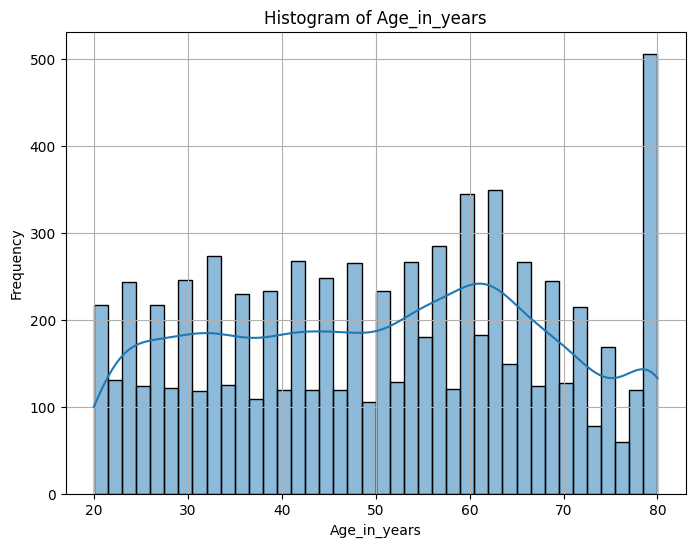

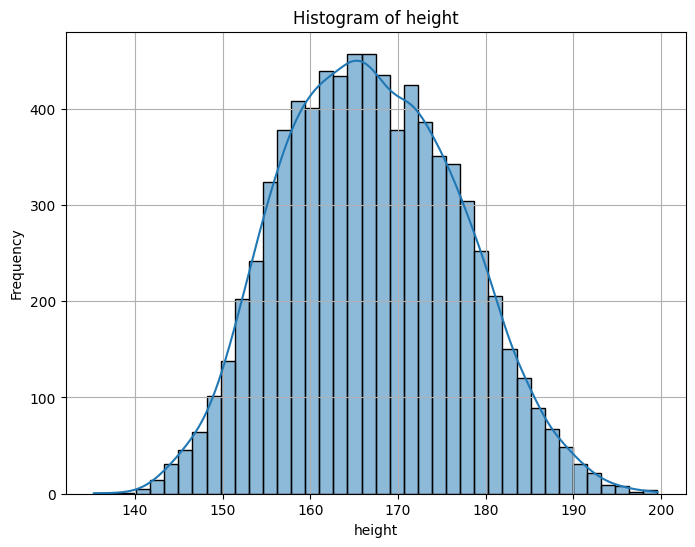

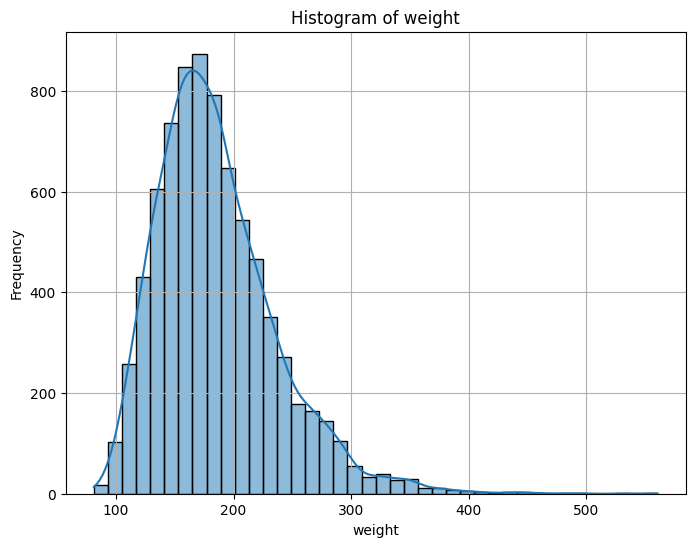

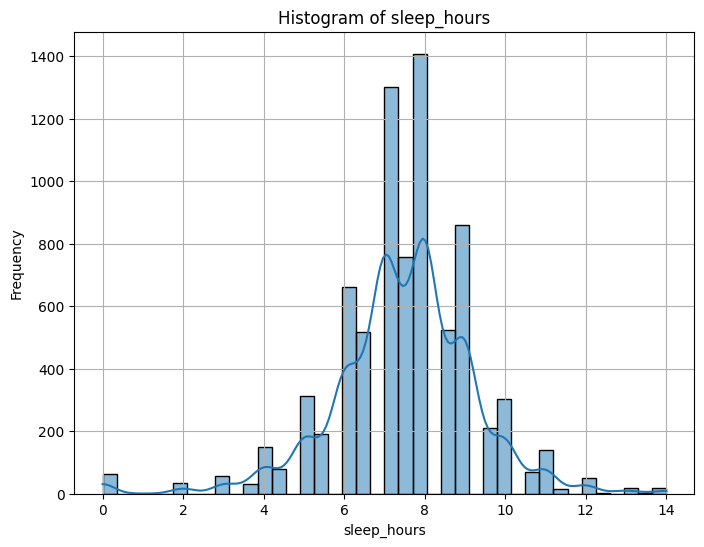

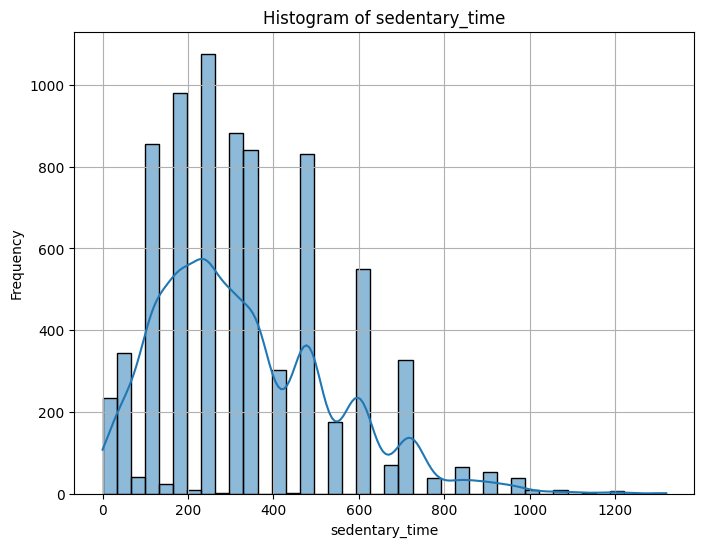

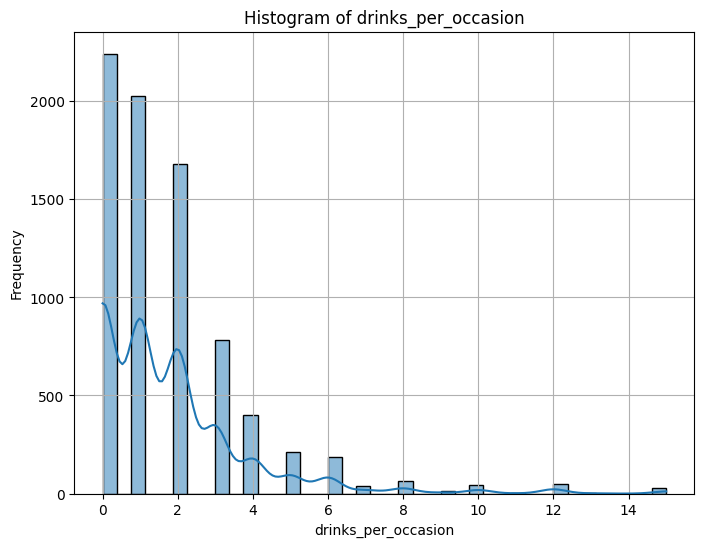

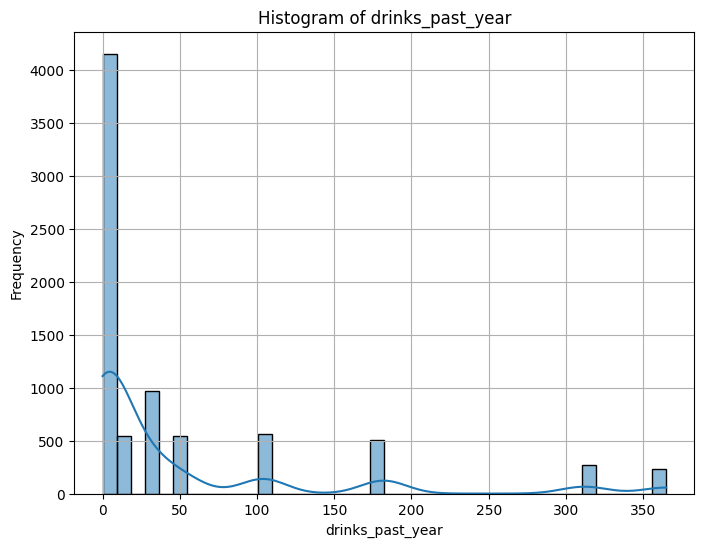

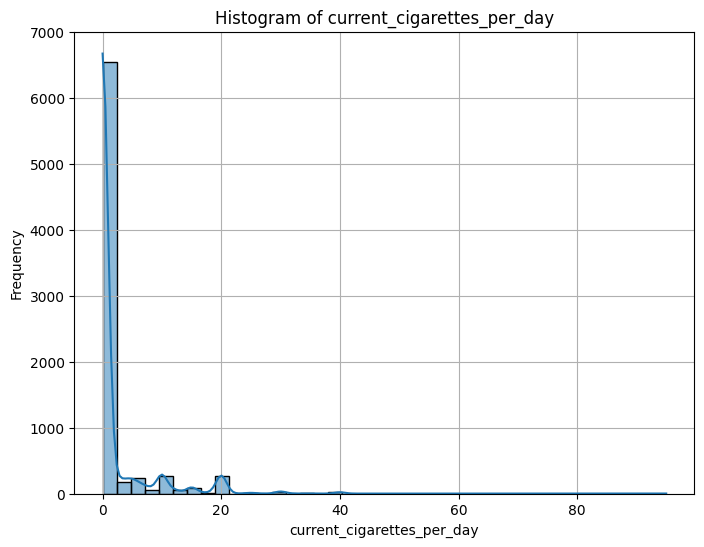

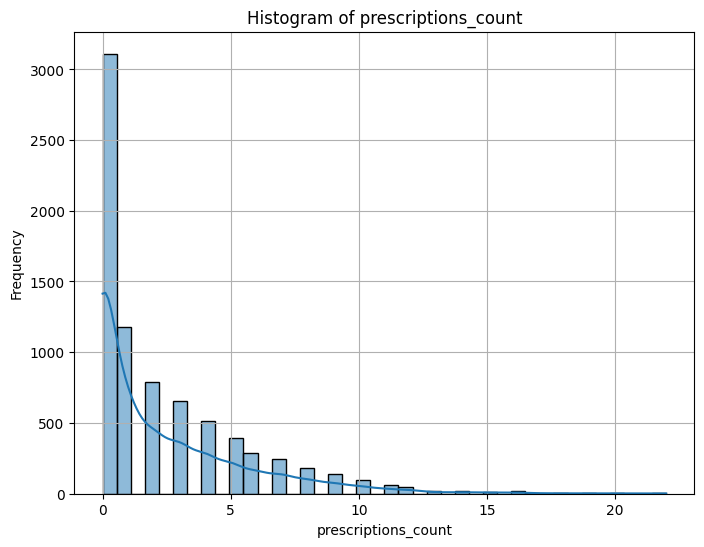

In [53]:
continuous_columns = ['Age_in_years', 'height', 'weight', 'sleep_hours',
        'sedentary_time', 'drinks_per_occasion', 'drinks_past_year', 'current_cigarettes_per_day', 'prescriptions_count']
# Assuming df is your DataFrame and continuous_columns contains the continuous feature names
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True, bins=40, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [54]:
df.isnull().sum()

SEQN                       0
depression                 0
race                       0
education_level            0
birth_place                0
                          ..
Rx_days_PENICILLIN         0
Rx_days_DIPHENHYDRAMINE    0
Rx_days_MINOCYCLINE        0
Rx_days_METHOCARBAMOL      0
weight                     0
Length: 221, dtype: int64

In [55]:
df = df[relevant_features]

In [ ]:
df.to_csv("CDC_Data/clean_data1.csv", index=False)